In [1]:
%store -r bkg_df
%store -r mc_df
%store -r data_df

import boost_histogram as bh
import hist
import mplhep
import numpy as np

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x113e89cd0>, cbar=<matplotlib.colorbar.Colorbar object at 0x113cb3b50>, text=[])

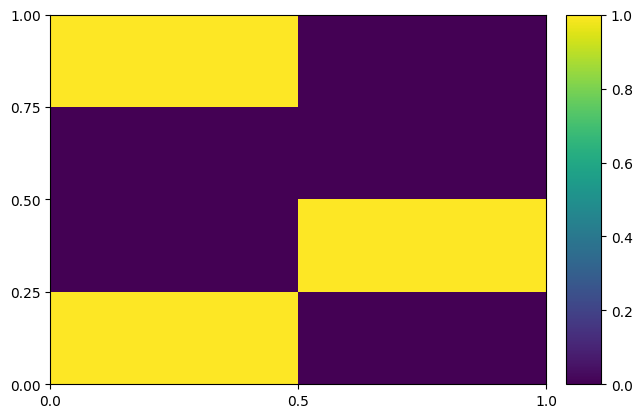

In [2]:
# Compose axis however you like; this is a 2D histogram
h = bh.Histogram(bh.axis.Regular(2, 0, 1),
                 bh.axis.Regular(4, 0.0, 1.0))

# Filling can be done with arrays, one per dimension
h.fill([.3, .5, .2],
          [.1, .4, .9])

# NumPy array view into histogram counts, no overflow bins
counts = h.view()
variances = h.variances()
mplhep.hist2dplot(h)

In [3]:
axis_reg = hist.axis.Regular(nbins, lower, upper, name=name)
axis_var = hist.axis.Variable([0, 0.5, 3.1, 3.4], name="eta")

NameError: name 'nbins' is not defined

In [4]:
start, stop = data_df['Jpsi_M'].min(), data_df['Jpsi_M'].max()
axis1 = hist.axis.Regular(bins=50, start=start, stop=stop, name="mass")

In [5]:
data_h = hist.Hist(axis1)

In [6]:
data_h.fill(data_df['Jpsi_M'])

Hist(Regular(50, 2.75, 3.5, name='mass'), storage=Double()) # Sum: 168384.0 (168385.0 with flow)

In [7]:
mc_h = hist.Hist(axis1).fill(mc_df['Jpsi_M'])  # we can also chain the commands

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x114425790>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

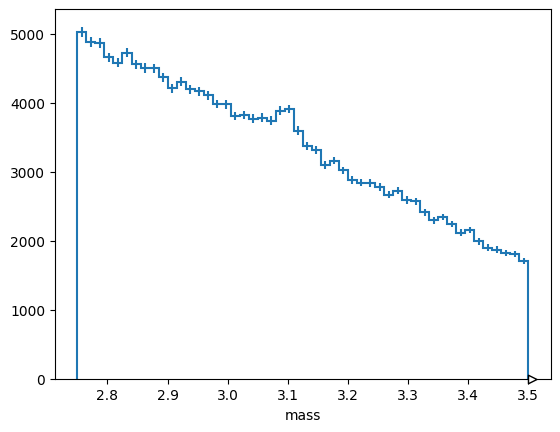

In [8]:
mplhep.histplot(data_h)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x16e104f10>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

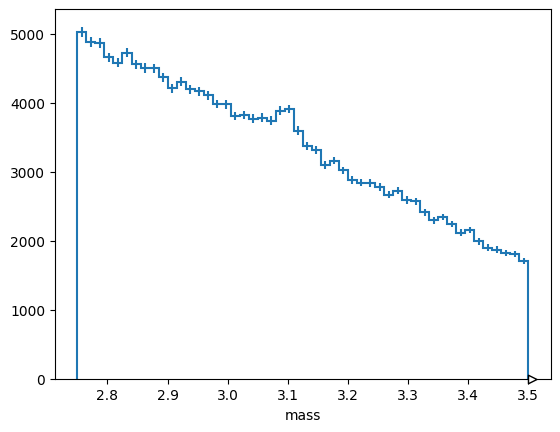

In [9]:
data_h.plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x16e1d7590>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

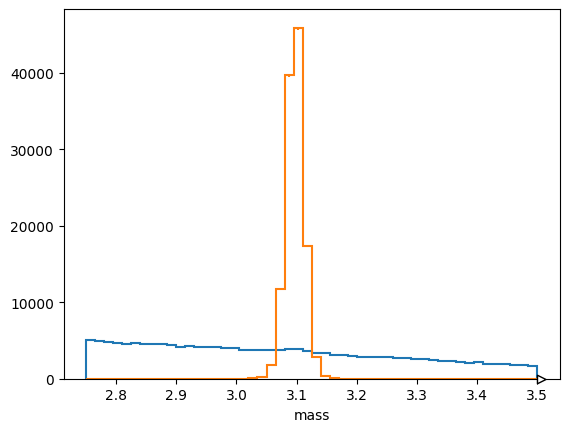

In [10]:
data_h.plot1d()
mc_h.plot1d()

In [11]:
mc_df.columns

Index(['Jpsi_PE', 'Jpsi_PX', 'Jpsi_PY', 'Jpsi_PZ', 'Jpsi_PT', 'Jpsi_P',
       'Jpsi_M', 'mum_PT', 'mum_PX', 'mum_PY', 'mum_PZ', 'mum_IP', 'mum_eta',
       'mum_M', 'mum_PE', 'mup_PT', 'mup_PX', 'mup_PY', 'mup_PZ', 'mup_IP',
       'mup_eta', 'mup_M', 'mup_PE', 'nTracks', 'mum_ProbNNmu', 'mum_ProbNNpi',
       'mup_ProbNNmu', 'mup_ProbNNpi', 'Jpsi_eta', 'mup_P', 'mum_P',
       'catagory', 'BDT'],
      dtype='object')

In [12]:
start, stop = data_df['BDT'].min(), data_df['BDT'].max()
axis_bdt = hist.axis.Regular(bins=20, start=start, stop=stop, name="BDT")

In [13]:
mc_h2d = hist.Hist(axis1, axis_bdt).fill(BDT=mc_df['BDT'], mass=mc_df['Jpsi_M']) # using names

In [14]:
data_h2d = hist.Hist(axis1, axis_bdt)
data_h2d.fill(data_df['Jpsi_M'], data_df['BDT']) # order based

Hist(
  Regular(50, 2.75, 3.5, name='mass'),
  Regular(20, 0.026503, 0.993653, name='BDT'),
  storage=Double()) # Sum: 168383.0 (168385.0 with flow)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x16e47fad0>, cbar=<matplotlib.colorbar.Colorbar object at 0x16e4aa1d0>, text=[])

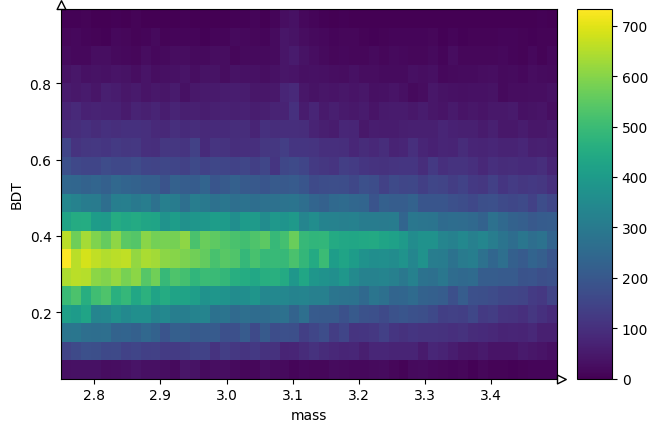

In [15]:
mplhep.hist2dplot(data_h2d)

In [16]:
# Access by bin number
data_h2d[35, 5]

318.0

In [17]:
data_h2d.density()

array([[0.24562342, 1.20355474, 2.32523501, 3.37322826, 4.07734872,
        5.27271602, 6.00139882, 5.38734028, 3.48785252, 2.77554461,
        1.97317478, 1.4737405 , 1.21992964, 0.7286828 , 0.6058711 ,
        0.42574726, 0.2947481 , 0.17193639, 0.09824937, 0.02456234],
       [0.27018576, 1.34274135, 2.36617225, 3.26679145, 4.2984098 ,
        5.37915283, 5.37915283, 4.68321982, 3.66797636, 2.66092035,
        1.94861244, 1.30999156, 0.87605685, 0.76143259, 0.69593302,
        0.39299747, 0.35206023, 0.13099916, 0.13099916, 0.02456234],
       [0.26199831, 1.46555306, 2.16148607, 3.49603997, 3.76622573,
        5.33002815, 5.6165888 , 5.19084155, 3.68435126, 2.48898396,
        1.85855052, 1.21992964, 0.95793133, 0.83511962, 0.54855896,
        0.42574726, 0.27837321, 0.12281171, 0.08187447, 0.05731213],
       [0.27018576, 1.43280327, 2.14511118, 2.74279482, 4.16741064,
        4.95340558, 5.42827752, 4.83059387, 3.29135379, 2.47260907,
        1.9240501 , 1.23630453, 0.98249367, 0

In [18]:
data_h2d.project("mass")  # we will here retain the 1D histogram

Hist(Regular(50, 2.75, 3.5, name='mass'), storage=Double()) # Sum: 168384.0 (168385.0 with flow)

In [19]:
data_h2d.axes

(Regular(50, 2.75, 3.5, name='mass'),
 Regular(20, 0.026503, 0.993653, name='BDT'))

In [20]:
data_h2d.axes['mass']

Regular(50, 2.75, 3.5, name='mass')

In [21]:
data_h2d.axes['mass'].edges

array([2.7500011 , 2.76500103, 2.78000096, 2.79500089, 2.81000082,
       2.82500076, 2.84000069, 2.85500062, 2.87000055, 2.88500048,
       2.90000041, 2.91500035, 2.93000028, 2.94500021, 2.96000014,
       2.97500007, 2.99000001, 3.00499994, 3.01999987, 3.0349998 ,
       3.04999973, 3.06499966, 3.0799996 , 3.09499953, 3.10999946,
       3.12499939, 3.13999932, 3.15499925, 3.16999919, 3.18499912,
       3.19999905, 3.21499898, 3.22999891, 3.24499884, 3.25999878,
       3.27499871, 3.28999864, 3.30499857, 3.3199985 , 3.33499843,
       3.34999837, 3.3649983 , 3.37999823, 3.39499816, 3.40999809,
       3.42499803, 3.43999796, 3.45499789, 3.46999782, 3.48499775,
       3.49999768])

In [22]:
data_h2d.axes['mass'].centers  # bin centers

array([2.75750106, 2.772501  , 2.78750093, 2.80250086, 2.81750079,
       2.83250072, 2.84750065, 2.86250059, 2.87750052, 2.89250045,
       2.90750038, 2.92250031, 2.93750024, 2.95250018, 2.96750011,
       2.98250004, 2.99749997, 3.0124999 , 3.02749983, 3.04249977,
       3.0574997 , 3.07249963, 3.08749956, 3.10249949, 3.11749942,
       3.13249936, 3.14749929, 3.16249922, 3.17749915, 3.19249908,
       3.20749902, 3.22249895, 3.23749888, 3.25249881, 3.26749874,
       3.28249867, 3.29749861, 3.31249854, 3.32749847, 3.3424984 ,
       3.35749833, 3.37249826, 3.3874982 , 3.40249813, 3.41749806,
       3.43249799, 3.44749792, 3.46249785, 3.47749779, 3.49249772])

In [23]:
data_h2d.axes['mass'].widths  # bin widths

array([0.01499993, 0.01499993, 0.01499993, 0.01499993, 0.01499993,
       0.01499993, 0.01499993, 0.01499993, 0.01499993, 0.01499993,
       0.01499993, 0.01499993, 0.01499993, 0.01499993, 0.01499993,
       0.01499993, 0.01499993, 0.01499993, 0.01499993, 0.01499993,
       0.01499993, 0.01499993, 0.01499993, 0.01499993, 0.01499993,
       0.01499993, 0.01499993, 0.01499993, 0.01499993, 0.01499993,
       0.01499993, 0.01499993, 0.01499993, 0.01499993, 0.01499993,
       0.01499993, 0.01499993, 0.01499993, 0.01499993, 0.01499993,
       0.01499993, 0.01499993, 0.01499993, 0.01499993, 0.01499993,
       0.01499993, 0.01499993, 0.01499993, 0.01499993, 0.01499993])

In [24]:
data_h2d.axes.edges
data_h2d.axes['mass'].centers
data_h2d.axes['mass'].widths
areas = np.prod(data_h2d.axes.widths, axis=0)
print(f"areas = {areas}")

areas = [[0.00072536 0.00072536 0.00072536 0.00072536 0.00072536 0.00072536
  0.00072536 0.00072536 0.00072536 0.00072536 0.00072536 0.00072536
  0.00072536 0.00072536 0.00072536 0.00072536 0.00072536 0.00072536
  0.00072536 0.00072536]
 [0.00072536 0.00072536 0.00072536 0.00072536 0.00072536 0.00072536
  0.00072536 0.00072536 0.00072536 0.00072536 0.00072536 0.00072536
  0.00072536 0.00072536 0.00072536 0.00072536 0.00072536 0.00072536
  0.00072536 0.00072536]
 [0.00072536 0.00072536 0.00072536 0.00072536 0.00072536 0.00072536
  0.00072536 0.00072536 0.00072536 0.00072536 0.00072536 0.00072536
  0.00072536 0.00072536 0.00072536 0.00072536 0.00072536 0.00072536
  0.00072536 0.00072536]
 [0.00072536 0.00072536 0.00072536 0.00072536 0.00072536 0.00072536
  0.00072536 0.00072536 0.00072536 0.00072536 0.00072536 0.00072536
  0.00072536 0.00072536 0.00072536 0.00072536 0.00072536 0.00072536
  0.00072536 0.00072536]
 [0.00072536 0.00072536 0.00072536 0.00072536 0.00072536 0.00072536
  0.0007

In [25]:
data_df_bdt = data_df.query("BDT > 0.9")

data_bdt_h2d = hist.Hist(axis1, axis_bdt)
data_bdt_h2d.fill(data_df_bdt['Jpsi_M'], data_df_bdt['BDT']) # order based

Hist(
  Regular(50, 2.75, 3.5, name='mass'),
  Regular(20, 0.026503, 0.993653, name='BDT'),
  storage=Double()) # Sum: 734.0 (735.0 with flow)

In [26]:
ratio = data_bdt_h2d.project("mass") / data_h2d.project("mass")

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x16e4cddd0>, errorbar=None, legend_artist=None)]

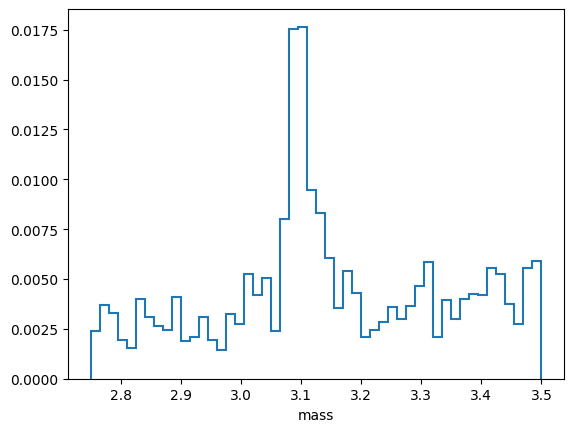

In [27]:
ratio.plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x16e5a5450>, errorbar=None, legend_artist=None)]

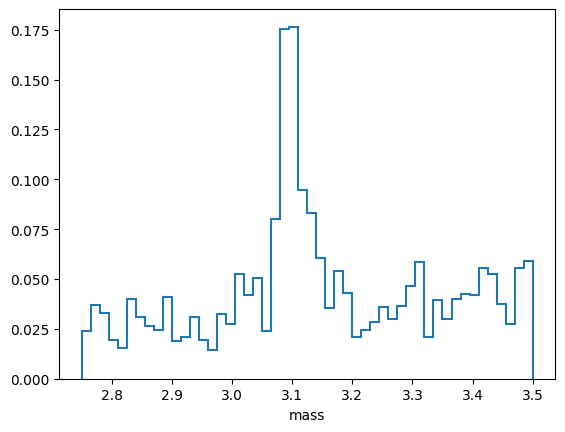

In [28]:
ratio_large = ratio * 10
ratio_large.plot1d()

In [29]:
weight = np.random.normal(1., 0.1, size=mc_df.shape[0])
storage = hist.storage.Weight()
mc_h2d = hist.Hist(axis1, axis_bdt, storage=storage).fill(BDT=mc_df['BDT'], mass=mc_df['Jpsi_M'], weight=weight) # using names

In [30]:
mc_h2d

Hist(
  Regular(50, 2.75, 3.5, name='mass'),
  Regular(20, 0.026503, 0.993653, name='BDT'),
  storage=Weight()) # Sum: WeightedSum(value=119957, variance=121135) (WeightedSum(value=120016, variance=121196) with flow)

In [31]:
mc_h2d.variances()

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.0000